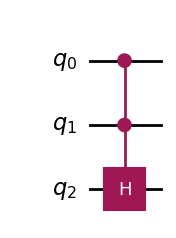

In [4]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt


qc = QuantumCircuit(3)
H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])
H_gate = UnitaryGate(H,label="H")
cH = H_gate.control(2,label="")
qc.append(cH,[0,1,2])
qc.draw("mpl")

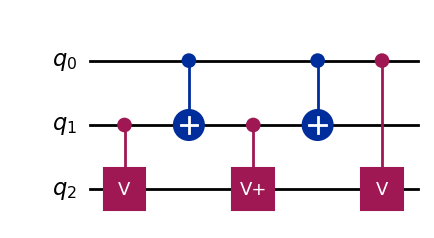

In [5]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt

from qiskit.circuit.library import HGate
import cmath

H = (1/np.sqrt(2))*np.array([[1,1],[1,-1]])

# Gets eigenvalues/vectors of H.
e_val,e_vec = np.linalg.eig(H)

# Constructs D and D^{1.2}
D = np.array([[e_val[0],0],[0,e_val[1]]])
Dhalf = np.array([[cmath.sqrt(e_val[0]),0],[0,cmath.sqrt(e_val[1])]])

# Construct K and K^-1
K = e_vec
Kinv = np.linalg.inv(K)

# Now we make V and Vdag, using K * Dhalf * Kinv.

V = K@Dhalf@Kinv
Vdag = V.T.conj()

# And now we construct the circuit.

qc = QuantumCircuit(3)

# construct unique cV and cVdag gates
V_gate = UnitaryGate(V,label="V")
Vdag_gate = UnitaryGate(Vdag,label="V+")
cV = V_gate.control(1,label="")
cVdag = Vdag_gate.control(1,label="")

X = np.array([[0,1],[1,0]])

# Controlled V on bits [1,2]

qc.append(cV,[1,2])

# CNOT on [0,1]
qc.cx(0,1)


# Controlled Vdagger on bits [1,2] 

qc.append(cVdag,[1,2])


# CNOT on [0,1]
qc.cx(0,1)


# Controlled V on bits [0,2]
qc.append(cV,[0,2])

qc.draw("mpl")